In [2]:
from qiskit import IBMQ
import qiskit.tools.jupyter

if not IBMQ.active_account():
    IBMQ.enable_account('YOUR_TOKEN')
provider = IBMQ.get_provider(hub='ibm-q-skku', group='kaist', project='kaist-graduate')
provider

<AccountProvider for IBMQ(hub='ibm-q-skku', group='kaist', project='kaist-graduate')>

In [3]:
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_TOKEN')
# provider = IBMQ.get_provider(hub='ibm-q-skku', group='kaist', project='kaist-graduate')
# provider

# # Next time,
if not IBMQ.active_account():
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q-skku', group='kaist', project='kaist-graduate')
provider

<AccountProvider for IBMQ(hub='ibm-q-skku', group='kaist', project='kaist-graduate')>

In [4]:
%qiskit_backend_overview
# provider.backends()

In [5]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))
backend

<IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-skku', group='kaist', project='kaist-graduate')>

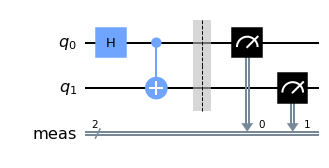

In [6]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')

In [ ]:
job = backend.run(qc, shots=2**13)
result = job.result()
counts = result.get_counts(qc)

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067688 > 1.066667). Truncating to maximum value.
Device reported a gate error parameter greater than maximum allowed value (1.000000 > 0.800000). Truncating to maximum value.
Device model returned a depolarizing error parameter greater than maximum allowed value (1.067629 > 1.066667). Truncating to maximum value.


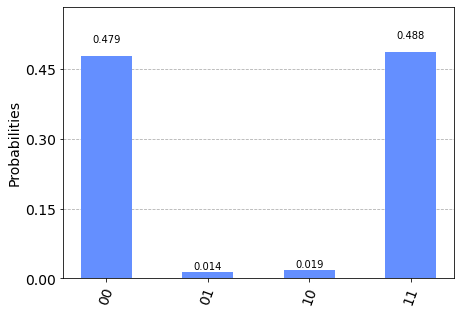

In [7]:
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

simulator = AerSimulator.from_backend(backend)
job = simulator.run(qc, shots=2**13)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [8]:
%qiskit_version_table